<h3 style="text-align:center">Multi-class logistic regression in PyTorch</h3>
<h4 style="text-align:center">3 classes application</h4>

In [1]:
import torch
from torch.autograd import Variable
from torch import nn
from torch import optim

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#graphical functions

def plot_points(X, y, m="_"):
    class0 = X[np.argwhere(y==0)]
    class1 = X[np.argwhere(y==1)]
    class2 = X[np.argwhere(y==2)]
    plt.scatter([s[0][0] for s in class0], [s[0][1] for s in class0], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker=m)
    plt.scatter([s[0][0] for s in class1], [s[0][1] for s in class1], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker=m)
    plt.scatter([s[0][0] for s in class2], [s[0][1] for s in class2], s = 25, color = 'yellow', edgecolor = 'k',zorder=2, marker=m)

def plot_zone(X, y):
    class0 = X[np.argwhere(y==0)]
    class1 = X[np.argwhere(y==1)]
    class2 = X[np.argwhere(y==2)]    
    plt.scatter([s[0][0] for s in class0], [s[0][1] for s in class0], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker="+")
    plt.scatter([s[0][0] for s in class1], [s[0][1] for s in class1], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker="_" )  
    plt.scatter([s[0][0] for s in class2], [s[0][1] for s in class2], s = 25, color = 'yellow', edgecolor = 'k',zorder=2, marker="_" )  
    

def view(forward,points,labels,log=True):

    datamin = np.min(points, axis=0)
    datamax = np.max(points, axis=0)
    xmin, ymin = datamin
    xmax, ymax = datamax    
       
    border = []
    xList = np.linspace(xmin, xmax, 50)
    for x in xList:
        yList = np.linspace(ymin, ymax, 50)
        for y in yList:
            out = forward(torch.Tensor([[x,y]]))
            #if net model has logsoftmax at forward
            #we get back probabilities by exp            
            if log == True:
                out = torch.exp(out)
            if(out[0][0].data.numpy()>0.5):    
                border.append([x,y,0])
            if(out[0][1].data.numpy()>0.5):    
                border.append([x,y,1])
            if(out[0][2].data.numpy()>0.5):    
                border.append([x,y,2])
                
    border = np.array(border)
    solutionX = border[:, [0,1]]
    solutionT = border[:, [2]]
    plot_zone(solutionX, solutionT)

    plot_points(points, labels,m="o")  

Define data

In [3]:
#from array
import pandas as pd
data = np.array([
    [1,10,0],
    [3,10,1],
    [1.8,2.0,2],
    [0,6,0],
    [-1,-1,1],
    [-2,10,2],
])
#or
#from file
data = pd.read_csv('data1.csv', header=None)
data = data.reset_index().to_numpy()
data = data[:,[1,2,3]]
#print(data)

points = data[:, [0,1]]
labels = data[:, [2]]
target = torch.from_numpy(labels)
target = target.t()[0].long()
features = torch.from_numpy(points).float() 

<p>Define a fully connected network with:</p> 
<ul>
<li>2 inputs</li> 
<li>10 neurons (1st layer)</li> 
<li>10 neurons (2nd layer)</li> 
<li>3 outputs (classes)</li>
</ul>

Explicit definitions (functions and net)

In [4]:
#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#rectified linear unit
def ReLU(input):
    return input.clamp(min=0)

def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

def nll(input, target): return -input[range(target.shape[0]), target].mean()

class NN0:
    def __init__(self):
        torch.manual_seed(1) # Set the random seed so things are predictable
                   
        self.activation = sigmoid
        #self.activation = ReLU
        self.activation2 = softmax
        
        self.W1 = Variable(torch.randn(2,  10, dtype=torch.float), requires_grad=True)
        self.W2 = Variable(torch.randn(10, 10, dtype=torch.float), requires_grad=True)
        self.W3 = Variable(torch.randn(10, 3,  dtype=torch.float), requires_grad=True)
        
        self.B1 = Variable(torch.randn(1, 10, dtype=torch.float), requires_grad=True)
        self.B2 = Variable(torch.randn(1, 10, dtype=torch.float), requires_grad=True)        
        self.B3 = Variable(torch.randn(1, 3, dtype=torch.float), requires_grad=True)        
    
    def forward(self,features):
        h1     = self.activation(torch.mm(features, self.W1) + self.B1)
        h2     = self.activation(torch.mm(h1, self.W2) + self.B2)
        output = self.activation2(torch.mm(h2, self.W3) + self.B3)
        return output
    
def train0(self, features, target, epochs = 100, learn_rate=0.01):            
            
    self.lossHistory = []

    for i in range(epochs):
        output = self.forward(features)
        logsoftmax = torch.log(softmax(output))
        loss = nll(logsoftmax,target)
            
        self.lossHistory.append(loss)
           
        loss.backward()
           
        with torch.no_grad():
            self.W1 -= learn_rate * self.W1.grad
            self.W2 -= learn_rate * self.W2.grad
            self.W3 -= learn_rate * self.W3.grad
            self.B1 -= learn_rate * self.B1.grad
            self.B2 -= learn_rate * self.B2.grad
            self.B3 -= learn_rate * self.B3.grad

            # Manually zero the gradients after updating weights
            self.W1.grad.zero_()
            self.W2.grad.zero_()
            self.W3.grad.zero_()
            self.B1.grad.zero_()
            self.B2.grad.zero_()
            self.B3.grad.zero_()   

tensor(0.7089, grad_fn=<NegBackward>)


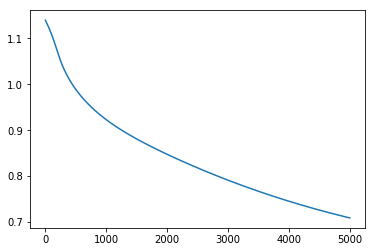

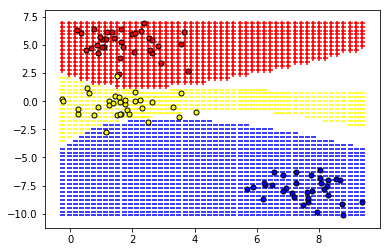

In [5]:
net = NN0()
net.train = train0
net.train(net,features,target,epochs=5000,learn_rate=0.01)

print(net.lossHistory[len(net.lossHistory)-1])
plt.plot(net.lossHistory)
plt.show()

view(net.forward,points,labels,log=False)

Module list definition

In [6]:
class NN(nn.Module):
    def __init__(self):
        torch.manual_seed(1)
        
        super().__init__()
        
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)        
        self.output = nn.Linear(10, 3)
        
        self.relu = nn.ReLU()
        #also could use sigmoid instead of ReLU
        #self.sigmoid = nn.Sigmoid()
        self.logsoftmax = nn.LogSoftmax(dim=1)       

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.relu(x)  
        x = self.fc2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        
        return x        

def train(self, features, target, epochs = 100, learn_rate=0.01):      
      
    self.lossHistory = []

    # Optimizers require the parameters to optimize and a learning rate
    optimizer = optim.SGD(self.parameters(), lr=learn_rate)    
    
    for i in range(epochs):
        output = self.forward(features)

        loss = nn.NLLLoss()(output,target)
        
        self.lossHistory.append(loss)

        # clear previous gradients, otherwise they will be accumulated
        optimizer.zero_grad()        

        # calculate gradients
        loss.backward()

        # update weights
        optimizer.step()

tensor(0.0580, grad_fn=<NllLossBackward>)


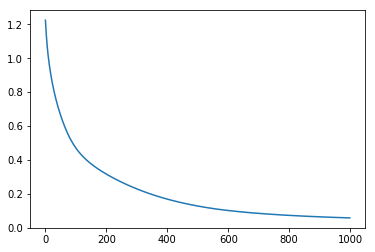

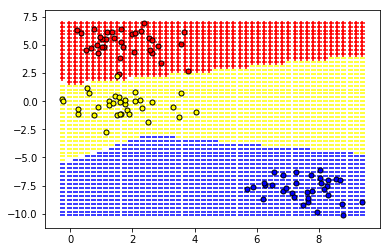

In [7]:
net = NN()
net.train = train
net.train(net,features,target,epochs=1000,learn_rate=0.01)

print(net.lossHistory[len(net.lossHistory)-1])
plt.plot(net.lossHistory)
plt.show()

view(net.forward,points,labels)

Sequential container definition

In [8]:
model = nn.Sequential(nn.Linear(2, 10),
                      nn.ReLU(),
                      nn.Linear(10, 10),
                      nn.ReLU(),
                      nn.Linear(10, 3),
                      nn.LogSoftmax(dim=1))

tensor(0.0580, grad_fn=<NllLossBackward>)


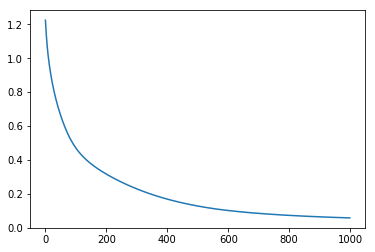

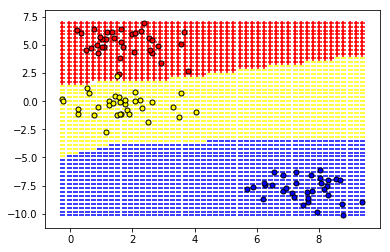

In [10]:
epochs = 1000
learn_rate = 0.01        

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learn_rate)

lossHistory = []

for i in range(epochs):
    output = model(features)

    loss = criterion(output,target)
        
    lossHistory.append(loss)

    # clear previous gradients, otherwise they will be accumulated
    optimizer.zero_grad()        

    # calculate gradients
    loss.backward()

    # update weights
    optimizer.step()

    
print(net.lossHistory[len(net.lossHistory)-1])
plt.plot(net.lossHistory)
plt.show()    
    
view(model,points,labels)    